# Simple Deep Learning Project: CIFAR-10 Image Classification

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# ---  Make Predictions () ---

In [2]:
print("TensorFlow Version:", tf.__version__)


print("Loading CIFAR-10 dataset...")
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


TensorFlow Version: 2.19.0
Loading CIFAR-10 dataset...


# Normalize pixel values to be between 0 and 1

In [3]:

train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


# --- 2. Visualize Sample Data (Optional) ---

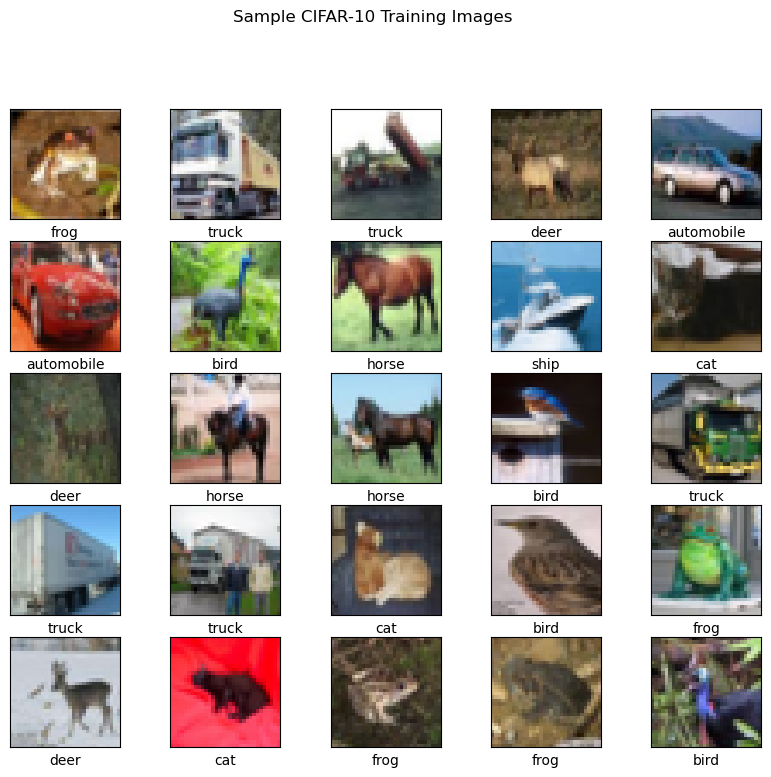

In [31]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
   
    plt.xlabel(class_names[train_labels[i][0]])
plt.suptitle("Sample CIFAR-10 Training Images")
plt.show()

In [5]:
# --- 3. Build the Convolutional Neural Network (CNN) Model ---
print("\nBuilding the CNN model...")

model = models.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 3
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the output to feed into Dense layers
    layers.Flatten(),

    # Dense Layers
    layers.Dense(64, activation='relu'),
    layers.Dense(10) # Output layer with 10 units for 10 classes (no activation here, handled by loss)
])



Building the CNN model...


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# --- 4. Compile the Model ---
print("Compiling the model...")
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Compiling the model...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

# --- 5. Train the Model ---

In [7]:

print("\nStarting model training...")

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Starting model training...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.3589 - loss: 1.7329 - val_accuracy: 0.5641 - val_loss: 1.2287
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5739 - loss: 1.1948 - val_accuracy: 0.6076 - val_loss: 1.1004
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6374 - loss: 1.0235 - val_accuracy: 0.6409 - val_loss: 1.0219
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6810 - loss: 0.9166 - val_accuracy: 0.6748 - val_loss: 0.9476
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7053 - loss: 0.8362 - val_accuracy: 0.6853 - val_loss: 0.9080
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7333 - loss: 0.7561 - val_accuracy: 0.6957 - val_loss: 0.8789
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7503 - loss: 0.7168 - val_accuracy: 0.7098 - val_loss: 0.8549
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12

# --- 6. Evaluate the Model ---

In [16]:

print("\nEvaluating the model on test data...")
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")


print("\nPlotting training history...")
plt.figure(figsize=(12, 5))


Evaluating the model on test data...
313/313 - 1s - 5ms/step - accuracy: 0.7047 - loss: 0.8762
Test accuracy: 0.7047

Plotting training history...


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

# Plot training & validation accuracy values

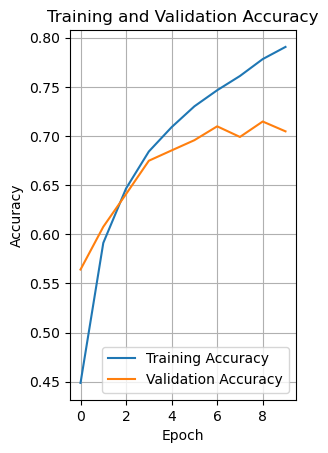

In [12]:

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss values

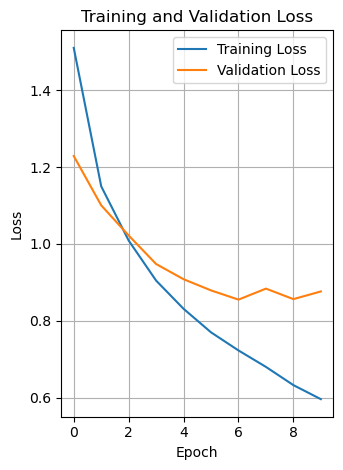

In [14]:

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --- 8. Make Predictions () ---


Making predictions on a few test images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Image 1: True Label: cat, Predicted Label: cat


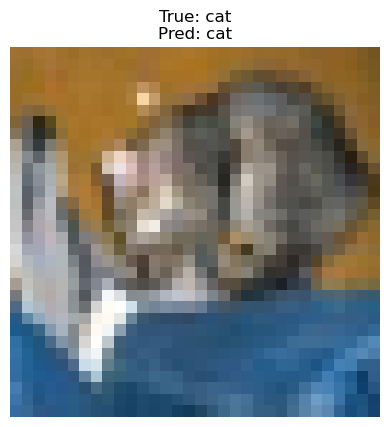

Image 2: True Label: ship, Predicted Label: automobile


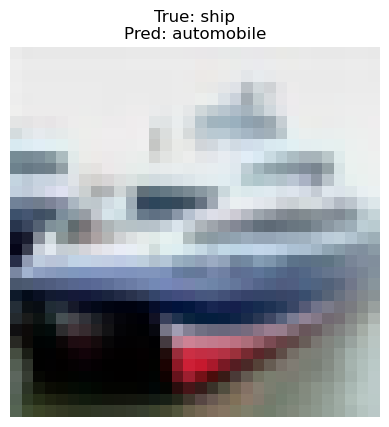

Image 3: True Label: ship, Predicted Label: airplane


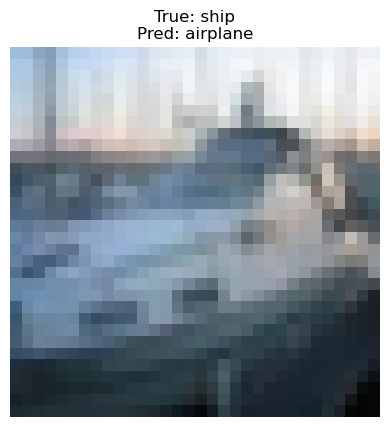

Image 4: True Label: airplane, Predicted Label: ship


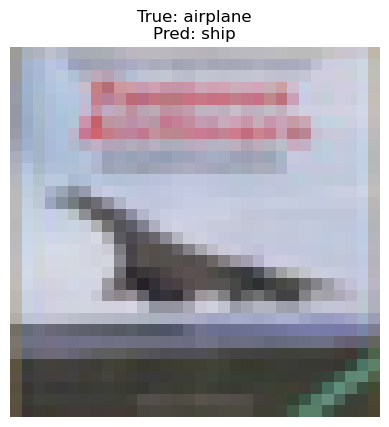

Image 5: True Label: frog, Predicted Label: frog


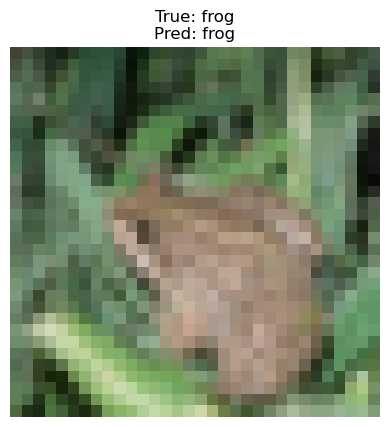


Simple deep learning project complete!


In [15]:

print("\nMaking predictions on a few test images...")
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images[:5]) 
for i in range(5):
    predicted_class_index = np.argmax(predictions[i])
    true_class_index = test_labels[i][0] 
    predicted_class_name = class_names[predicted_class_index]
    true_class_name = class_names[true_class_index]

    print(f"Image {i+1}: True Label: {true_class_name}, Predicted Label: {predicted_class_name}")

    plt.imshow(test_images[i])
    plt.title(f"True: {true_class_name}\nPred: {predicted_class_name}")
    plt.axis('off')
    plt.show()

print("\nSimple deep learning project complete!")